In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("26-customer_data.csv")

In [3]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

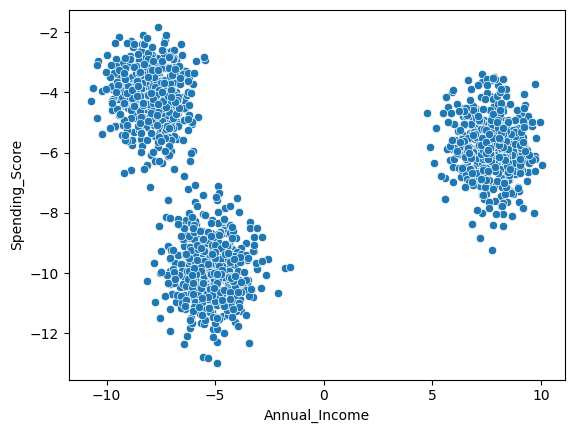

In [9]:
sns.scatterplot(df, x="Annual_Income", y="Spending_Score")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=15)

In [12]:
X_train

,Annual_Income,Spending_Score
258,7.809992,-5.031123
195,7.769519,-6.059915
817,-8.529586,-4.853877
820,-5.765759,-9.822013
716,-7.932068,-4.882406
...,...,...
667,-6.734875,-5.107626
156,-8.236823,-3.127431
384,-7.744180,-3.563590
645,-6.151325,-9.263209


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[196.9206878471016,
 68.44836482219306,
 11.697030239519933,
 9.894467336616092,
 8.100984024900308,
 6.089842499353228,
 5.571367459972522,
 4.924610429373042,
 4.689265318096206,
 4.022232380078011]

([<matplotlib.axis.XTick at 0x1f293d2b390>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

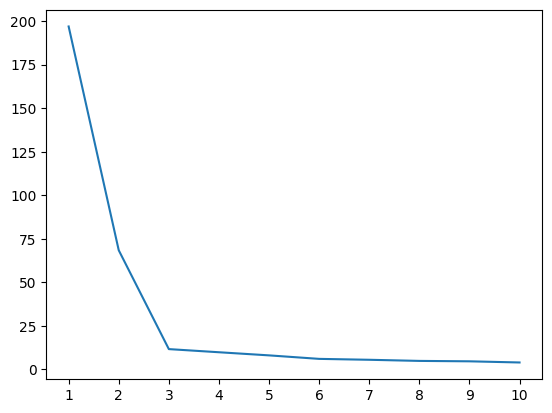

In [22]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

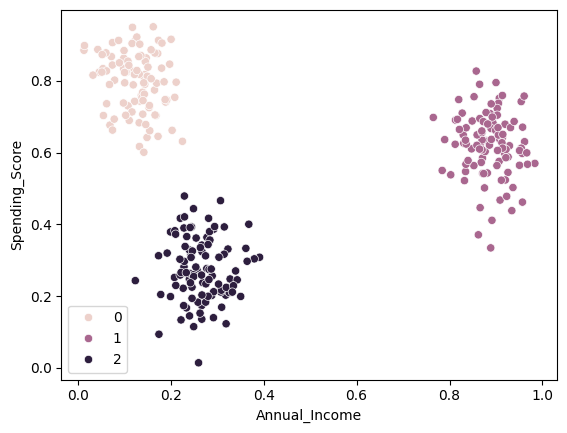

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)
y_pred = kmeans.predict(X_test_scaled)
sns.scatterplot(data=pd.DataFrame(X_test_scaled, columns=X_test.columns), x="Annual_Income", y="Spending_Score", hue=y_pred)

In [28]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)

3


([<matplotlib.axis.XTick at 0x1f293de34d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

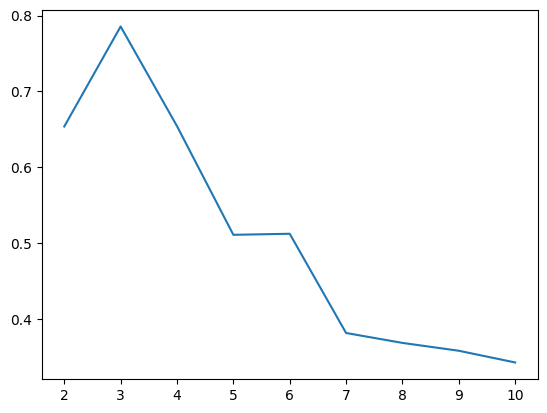

In [29]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2,11), silhouette_scores)
plt.xticks(range(2,11))